In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [3]:
%cd 'drive/My Drive/CAN_Car_hacking'

/content/drive/.shortcut-targets-by-id/1EaHNG2BxuluV5xJrVaggv5oeTCjxJT3H/CAN_Car_hacking


In [4]:
with open('Sequence_datasets/normal_data_sequence_level_100.npy', 'rb') as f:
  normal_sequences = np.load(f, allow_pickle = True)
normal_sequences.shape

(19776, 100, 12)

In [ ]:
normal_sequences[:, :, 11]
print(normal_sequences[15000, 1, 0])

1479121792.0


In [ ]:
normal_sequences[0][0]

array([1479121408.0, '0350', 8, 0.019607843831181526, 0.1568627506494522,
       0.5176470875740051, 0.4000000059604645, 0.4274509847164154, 0.0,
       0.0, 0.6352941393852234, 'R'], dtype=object)

In [5]:
arr = []
ls = []
for sequence in normal_sequences[:, :, 1]:
  ls = []
  for elem in sequence:
    ls.append(int(elem, 16))
  arr.append(np.array(ls))

In [6]:
x = np.array(arr)

In [7]:
normal_sequences[:, :, 1] = x

In [8]:
normal_sequences[:, :, 1] = (normal_sequences[:, :, 1] - normal_sequences[:, :, 1].min()) / 1678

In [9]:
normal_sequences = normal_sequences[:, :, [1, 3, 4,5,6,7,8,9,10]] #id, d[0]...d[7]

In [10]:
normal_sequences.shape

(19776, 100, 9)

In [ ]:
normal_sequences.astype('float32')[0].shape

(100, 9)

In [10]:
from sklearn.model_selection import train_test_split
normal_sequences_train, normal_sequences_test = train_test_split(normal_sequences, test_size = 0.35)
normal_sequences_train.shape,normal_sequences_test.shape

((12854, 100, 9), (6922, 100, 9))

In [11]:
import tensorflow as tf

In [12]:
normal_sequences_train_tf = tf.data.Dataset.from_tensor_slices((normal_sequences_train.astype('float32'), normal_sequences_train.astype('float32'))).batch(256)
normal_sequences_test_tf = tf.data.Dataset.from_tensor_slices((normal_sequences_test.astype('float32'), normal_sequences_test.astype('float32'))).batch(128)
normal_sequences_train_tf

<BatchDataset shapes: ((None, 100, 9), (None, 100, 9)), types: (tf.float32, tf.float32)>

In [13]:
def get_model(units=[256,256,256,256],num_layers=4,seq_len=100,seq_width=9):   
    inpt = tf.keras.layers.Input((seq_len,seq_width))
    x = tf.keras.layers.Conv1D(filters=100, kernel_size=3, strides=1,padding='same' ,activation='relu')(inpt)
    #x = Conv1D(filters=24, kernel_size=2, strides=1, padding="same", activation='relu')(x)

    x = tf.keras.layers.LSTM(units[0],activation='relu',return_sequences=True,unroll=True)(x)
    for i in range(num_layers-1):
        x = tf.keras.layers.LSTM(units[i+1],activation='relu',return_sequences=True,unroll=True)(x)
    out = tf.keras.layers.Dense(seq_width,activation='relu')(x)
    model = tf.keras.Model(inpt,out)

    return model

In [ ]:
# epochs = 100
# lr = 1e-4
# opt = tf.keras.optimizers.Adam(lr)

In [ ]:
# model = get_model()
# model.summary(  )

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 9)]          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 100)          2800      
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 256)          365568    
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
dense_1 (Dense)              (None, 100, 9)            2313

In [ ]:
# model.compile(optimizer=opt,
#               loss='mae',
#               metrics=['mse'])

In [ ]:
# cp = tf.keras.callbacks.ModelCheckpoint('model_checkpoint_new.h5',monitor='loss',save_best_only=True)
# es = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=200,restore_best_weights=True)
# csv = tf.keras.callbacks.CSVLogger('train_log.csv')

In [ ]:
# history = model.fit(normal_sequences_train_tf, epochs = 5000, validation_data= normal_sequences_test_tf,callbacks=[cp, es, csv] ,verbose = True)

Epoch 1/5000
51/51 [==============================] - 68s 368ms/step - loss: 0.2255 - mse: 0.1376 - val_loss: 0.2065 - val_mse: 0.1146
Epoch 2/5000
51/51 [==============================] - 12s 237ms/step - loss: 0.2061 - mse: 0.1143 - val_loss: 0.2048 - val_mse: 0.1126
Epoch 3/5000
51/51 [==============================] - 12s 237ms/step - loss: 0.2045 - mse: 0.1126 - val_loss: 0.2033 - val_mse: 0.1123
Epoch 4/5000
51/51 [==============================] - 12s 233ms/step - loss: 0.2025 - mse: 0.1123 - val_loss: 0.2000 - val_mse: 0.1117
Epoch 5/5000
51/51 [==============================] - 12s 233ms/step - loss: 0.1992 - mse: 0.1114 - val_loss: 0.1980 - val_mse: 0.1099
Epoch 6/5000
51/51 [==============================] - 12s 233ms/step - loss: 0.1975 - mse: 0.1097 - val_loss: 0.1966 - val_mse: 0.1086
Epoch 7/5000
51/51 [==============================] - 12s 237ms/step - loss: 0.1962 - mse: 0.1083 - val_loss: 0.1952 - val_mse: 0.1071
Epoch 8/5000
51/51 [==============================] - 1

In [16]:
log = pd.read_csv('train_log.csv')

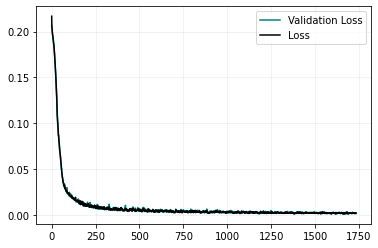

In [17]:
plt.figure()
plt.plot(log['val_loss'],color='teal')
plt.plot(log['loss'],color='k')
plt.legend(['Validation Loss','Loss'])
plt.grid(alpha=0.2)
plt.show()

In [14]:
with open('Sequence_datasets/dos_sequence_level_attack_100_2_perc.npy', 'rb') as f:
  dos_data = np.load(f, allow_pickle= True)

In [42]:
with open('Sequence_datasets/rpm_sequence_level_attack_100_2_perc.npy', 'rb') as f:
  rpm_data = np.load(f, allow_pickle= True)

In [26]:
with open('Sequence_datasets/gear_sequence_level_attack_100_2_perc.npy', 'rb') as f:
  gear_data = np.load(f, allow_pickle= True)

In [48]:
with open('Sequence_datasets/fuzzy_sequence_level_attack_100_2_perc.npy', 'rb') as f:
  fuzzy_data = np.load(f, allow_pickle= True)

In [ ]:
arr = []
ls = []
for sequence in dos_data[:, :, 1]:
  ls = []
  for elem in sequence:
    ls.append(int(elem, 16))
  arr.append(np.array(ls))

In [44]:
arr = []
ls = []
for sequence in rpm_data[:, :, 1]:
  ls = []
  for elem in sequence:
    ls.append(int(elem, 16))
  arr.append(np.array(ls))

In [27]:
arr = []
ls = []
for sequence in gear_data[:, :, 1]:
  ls = []
  for elem in sequence:
    ls.append(int(elem, 16))
  arr.append(np.array(ls))

In [49]:
# arr = []
# ls = []
# for sequence in fuzzy_data[:, :, 1]:
#   ls = []
#   for elem in sequence:
#     ls.append(int(elem, 16))
#   arr.append(np.array(ls))

In [ ]:
# dos_data.shape
# rpm_data.shape
gear_data.shape, fuzzy_data.shape

((37727, 100, 12), (25773, 100, 12))

In [16]:
x = np.array(arr)
dos_data[:, :, 1] = x

In [45]:
x = np.array(arr)
rpm_data[:, :, 1] = x

In [28]:
x = np.array(arr)
gear_data[:, :, 1] = x

In [50]:
# x = np.array(arr)
# fuzzy_data[:, :, 1] = x

In [46]:
# dos_data[:, :, 1].max() - dos_data[:, :, 1].min()
rpm_data[:, :, 1].max() - rpm_data[:, :, 1].min()
# gear_data[:, :, 1].max() - gear_data[:, :, 1].min()
# fuzzy_data[:, :, 1].max() - fuzzy_data[:, :, 1].min()

1678

In [17]:
dos_data[:, :, 1] = (dos_data[:,:, 1] - dos_data[:, :, 1].min()) / 1680
dos_data[0]

array([[1478198400.0, 0.0011904761904761906, 8, ..., 0.0235294122248888,
        0.2666666805744171, 'R'],
       [1478198400.0, 0.41904761904761906, 8, ..., 0.0, 0.0, 'R'],
       [1478198400.0, 0.5047619047619047, 8, ..., 0.0,
        0.9960784316062927, 'R'],
       ...,
       [1478198400.0, 0.47023809523809523, 8, ..., 0.0,
        0.43529412150382996, 'R'],
       [1478198400.0, 0.0, 8, ..., 0.0, 0.0, 'T'],
       [1478198400.0, 0.48154761904761906, 8, ..., 0.0,
        0.0784313753247261, 'R']], dtype=object)

In [48]:
rpm_data[:, :, 1] = (rpm_data[:,:, 1] - rpm_data[:, :, 1].min()) / 1678
rpm_data[0]

array([[1478190976.0, 0.7520858164481525, 8, ..., 0.8196078538894653,
        0.07450980693101883, 'R'],
       [1478190976.0, 0.8027413587604291, 8, ..., 0.0, 0.0, 'R'],
       [1478190976.0, 0.41835518474374256, 8, ..., 0.0, 0.0, 'R'],
       ...,
       [1478190976.0, 0.20083432657926104, 8, ..., 0.0, 0.0, 'R'],
       [1478190976.0, 0.4696066746126341, 8, ..., 0.0, 1.0, 'T'],
       [1478190976.0, 0.1799761620977354, 8, ..., 0.027450980618596077,
        0.6039215922355652, 'R']], dtype=object)

In [29]:
gear_data[:, :, 1] = (gear_data[:,:, 1] - gear_data[:, :, 1].min()) / 1678
gear_data[0]

array([[1478193152.0, 0.20083432657926104, 8, ..., 0.0, 0.0, 'R'],
       [1478193152.0, 0.1799761620977354, 8, ..., 0.03529411926865578,
        0.9607843160629272, 'R'],
       [1478193152.0, 0.18057210965435042, 8, ..., 0.03529411926865578,
        0.23529411852359772, 'R'],
       ...,
       [1478193152.0, 0.36114421930870083, 8, ..., 0.4627451002597809,
        0.18431372940540314, 'R'],
       [1478193152.0, 0.399284862932062, 8, ..., 0.7411764860153198, 0.0,
        'R'],
       [1478193152.0, 0.48092967818831944, 8, ..., 0.0,
        0.0784313753247261, 'R']], dtype=object)

In [52]:
# fuzzy_data[:, :, 1] = (fuzzy_data[:,:, 1] - fuzzy_data[:, :, 1].min()) / 2047
# fuzzy_data[0]

array([[1478195712.0, 0.32828529555446995, 8, ..., 0.7411764860153198,
        0.0, 'R'],
       [1478195712.0, 0.39521250610649733, 8, ..., 0.0,
        0.0784313753247261, 'R'],
       [1478195712.0, 0.6174890083048363, 8, ..., 0.8196078538894653,
        0.07450980693101883, 'R'],
       ...,
       [1478195712.0, 0.6590131900341963, 8, ..., 0.0, 0.0, 'R'],
       [1478195712.0, 0.33610161211529066, 5, ..., 0.0, 0.0, 'R'],
       [1478195712.0, 0.5236932095749878, 8, ..., 0.0, 0.0, 'R']],
      dtype=object)

In [18]:
dos_data = dos_data[:, :, [1, 3, 4, 5, 6, 7, 8, 9, 10]]

dos_data[0]

array([[0.0011904761904761906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0235294122248888, 0.2666666805744171],
       [0.41904761904761906, 0.0784313753247261, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0],
       [0.5047619047619047, 0.019607843831181526, 0.125490203499794,
        0.7686274647712708, 0.40784314274787903, 0.46666666865348816,
        0.0, 0.0, 0.9960784316062927],
       [0.18095238095238095, 0.08627451211214066, 0.501960813999176, 0.0,
        1.0, 0.250980406999588, 0.501960813999176, 0.0235294122248888,
        0.5058823823928833],
       [0.18154761904761904, 0.054901961237192154, 0.501960813999176,
        0.0, 0.0, 0.21960784494876862, 0.49803921580314636,
        0.0235294122248888, 0.2862745225429535],
       [0.19047619047619047, 0.0, 0.0, 0.0, 0.0, 0.0941176488995552, 0.0,
        0.14901961386203766, 0.843137264251709],
       [0.5238095238095238, 0.0, 0.125490203499794, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0],
       [0.6470238095238096, 0.0, 0.250980406999588, 

In [49]:
rpm_data = rpm_data[:, :, [1, 3, 4, 5, 6, 7, 8, 9, 10]]
rpm_data[0]

array([[0.7520858164481525, 0.0, 0.0, 0.0, 0.501960813999176, 0.0,
        0.40392157435417175, 0.8196078538894653, 0.07450980693101883],
       [0.8027413587604291, 0.8470588326454163, 0.0, 0.0,
        0.5215686559677124, 0.0, 0.0, 0.0, 0.0],
       [0.41835518474374256, 0.08235294371843338, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0],
       [0.6376638855780691, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.7145411203814065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.29499404052443384, 0.0313725508749485, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0],
       [0.20083432657926104, 0.0, 0.12941177189350128, 0.062745101749897,
        1.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0235294122248888,
        0.007843137718737125, 0.5215686559677124],
       [0.1799761620977354, 0.04313725605607033, 0.501960813999176, 0.0,
        1.0, 0.16470588743686676, 0.501960813999176,
        0.007843137718737125, 0.9607843160629272],
       [0.18057210965435042, 0.98431

In [30]:
gear_data = gear_data[:, :, [1, 3, 4, 5, 6, 7, 8, 9, 10]]
gear_data[0]

array([[0.20083432657926104, 0.0, 0.12941177189350128, 0.062745101749897,
        1.0, 0.0, 1.0, 0.0, 0.0],
       [0.1799761620977354, 0.0, 0.501960813999176, 0.0, 1.0,
        0.9725490212440491, 0.49803921580314636, 0.03529411926865578,
        0.9607843160629272],
       [0.18057210965435042, 0.9490196108818054, 0.49803921580314636,
        0.0, 0.0, 0.3333333432674408, 0.49803921580314636,
        0.03529411926865578, 0.23529411852359772],
       [0.18951132300357568, 0.0, 0.0, 0.0, 0.0, 0.125490203499794,
        0.007843137718737125, 0.16078431904315948, 0.8156862854957581],
       [0.41835518474374256, 0.08235294371843338, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0],
       [0.5041716328963052, 0.019607843831181526, 0.125490203499794,
        0.20392157137393951, 0.40784314274787903, 0.46666666865348816,
        0.0, 0.0, 0.054901961237192154],
       [0.5232419547079857, 0.0, 0.125490203499794, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0],
       [0.6466030989272944, 0.062745101749897

In [ ]:
fuzzy_data = fuzzy_data[:, :, [1, 3, 4, 5, 6, 7, 8, 9, 10]]
fuzzy_data[0]

In [ ]:
# dos_data[:, :, 1:] = dos_data[:, :, 1:] / 255.

In [ ]:
# dos_data[0][:100]

In [19]:
import random

ls = random.sample(range(0, len(dos_data)), 2000)
ls[:5]

[3824, 6842, 10304, 5590, 8773]

In [50]:
# dos_data_tf = tf.data.Dataset.from_tensor_slices(dos_data.astype('float32')).batch(32)
# dos_data_tf
rpm_data_tf = tf.data.Dataset.from_tensor_slices(rpm_data.astype('float32')).batch(32)
rpm_data_tf
# gear_data_tf = tf.data.Dataset.from_tensor_slices(gear_data.astype('float32')).batch(32)
# gear_data_tf
# fuzzy_data_tf = tf.data.Dataset.from_tensor_slices(fuzzy_data[ls].astype('float32')).batch(32)
# fuzzy_data_tf

<BatchDataset shapes: (None, 100, 9), types: tf.float32>

In [51]:
model = get_model()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 9)]          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 100, 100)          2800      
_________________________________________________________________
lstm_8 (LSTM)                (None, 100, 256)          365568    
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 256)          525312    
_________________________________________________________________
lstm_11 (LSTM)               (None, 100, 256)          525312    
_________________________________________________________________
dense_2 (Dense)              (None, 100, 9)            2313

In [52]:
model.load_weights('model_checkpoint_cnn_lstm.h5')

In [23]:
dos_reconstructions = model.predict(dos_data_tf)
dos_train_loss = tf.keras.losses.mae(dos_reconstructions, dos_data.astype('float32'))

In [53]:
rpm_reconstructions = model.predict(rpm_data_tf)
rpm_train_loss = tf.keras.losses.mae(rpm_reconstructions, rpm_data.astype('float32'))

In [35]:
gear_reconstructions = model.predict(gear_data_tf)
gear_train_loss = tf.keras.losses.mae(gear_reconstructions, gear_data.astype('float32'))

In [58]:
# fuzzy_reconstructions = model.predict(fuzzy_data_tf)
# fuzzy_train_loss = tf.keras.losses.mae(fuzzy_reconstructions, fuzzy_data[ls].astype('float32'))

In [54]:
# dos_train_loss = np.mean(dos_train_loss, axis = 1)
# dos_train_loss.shape
rpm_train_loss = np.mean(rpm_train_loss, axis = 1)
rpm_train_loss.shape
# gear_train_loss = np.mean(gear_train_loss, axis = 1)
# gear_train_loss.shape
# fuzzy_train_loss = np.mean(fuzzy_train_loss, axis = 1)
# fuzzy_train_loss.shape

(41782,)

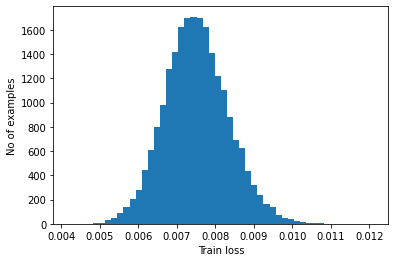

In [25]:
plt.hist(dos_train_loss, bins=50) #Plotting dos error distribution
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

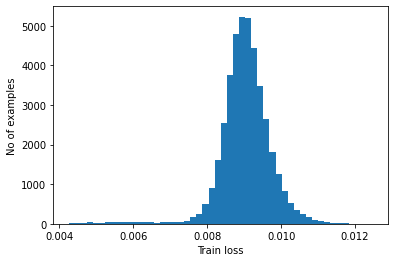

In [55]:
plt.hist(rpm_train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

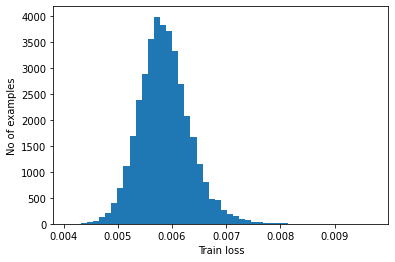

In [37]:
plt.hist(gear_train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

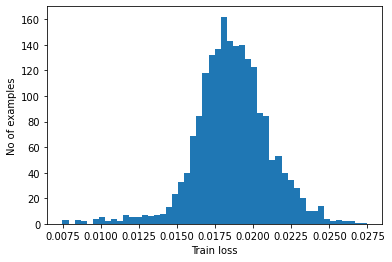

In [60]:
plt.hist(fuzzy_train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
fuzzy_reconstructions[0][0], fuzzy_data[0][0]

(array([0.48560664, 0.62725544, 0.64697075, 0.24452834, 0.6270812 ,
        0.8778511 , 0.33376116, 0.38118625, 0.23858182], dtype=float32),
 array([0.4934049829018075, 0.6352941393852234, 0.6627451181411743,
        0.2705882489681244, 0.6117647290229797, 0.8705882430076599,
        0.34117648005485535, 0.38823530077934265, 0.23529411852359772],
       dtype=object))

In [38]:
normal_reconstructions = model.predict(normal_sequences_test_tf)
normal_train_loss = tf.keras.losses.mae(normal_reconstructions, normal_sequences_test.astype('float32'))

In [ ]:
normal_sequences_test[0][0], normal_reconstructions[0][0]

(array([0.1799761620977354, 0.9529411792755127, 0.5098039507865906, 0.0,
        1.0, 0.3176470696926117, 0.5137255191802979, 0.0117647061124444,
        0.0117647061124444], dtype=object),
 array([0.17818788, 0.94544905, 0.51455635, 0.        , 0.99248403,
        0.32207865, 0.49958697, 0.00986378, 0.01308154], dtype=float32))

In [39]:
normal_train_loss = np.mean(normal_train_loss.numpy(), axis = 1)

In [ ]:
normal_train_loss.shape

(6922,)

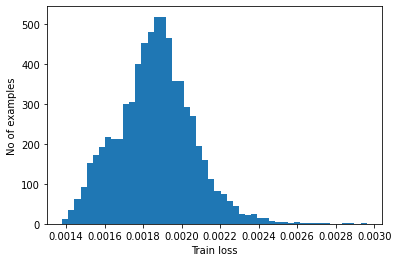

In [39]:
plt.hist(normal_train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
np.mean(normal_train_loss)

0.0018658655

In [ ]:
normal_labels = np.zeros(6922)
normal_labels.shape

(6922,)

In [ ]:
# dos_labels = np.ones(len(dos_data))
# dos_labels.shape
# rpm_labels = np.ones(len(rpm_data))
# rpm_labels.shape
# gear_labels = np.ones(len(gear_data))
# gear_labels.shape
fuzzy_labels = np.ones(len(fuzzy_data))
fuzzy_labels.shape

(557,)

In [ ]:
# test_data = np.concatenate([normal_sequences_test[:2000], dos_data])
# test_data.shape
# test_data = np.concatenate([normal_sequences_test[:2000], rpm_data])
# test_data.shape
# test_data = np.concatenate([normal_sequences_test[:2000], gear_data])
# test_data.shape
test_data = np.concatenate([normal_sequences_test[:2000], fuzzy_data])

In [ ]:
# test_labels = np.concatenate([normal_labels[:2000], dos_labels])
# test_labels.shape
# test_labels = np.concatenate([normal_labels[:2000], rpm_labels])
# test_labels.shape
# test_labels = np.concatenate([normal_labels[:2000], gear_labels])
# test_labels.shape
test_labels = np.concatenate([normal_labels[:2000], fuzzy_labels])
test_labels.shape

(2472,)

In [ ]:
# test_reconstructions = np.concatenate([normal_reconstructions[:2000], dos_reconstructions])
# test_reconstructions = np.concatenate([normal_reconstructions[:2000], rpm_reconstructions])
test_reconstructions = np.concatenate([normal_reconstructions[:2000], gear_reconstructions])

In [ ]:
test_reconstructions.shape

(2472, 100, 9)

In [ ]:
from random import shuffle

ind_list = [i for i in range(2472)]
shuffle(ind_list)
test_data_new = test_data[ind_list, :, :]
test_labels_new = test_labels[ind_list]
test_reconstructions_new = test_reconstructions[ind_list, :, :]

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
##Automated Thresholding Algorithm
##------------------------------------------------
import math

#Some initializations are required
ln = 50  #specified by the user
res =100. #specified by the user usually based the order of the training loss/ usually 100 )
st = 0.000 #always set 0
n = 2 #no. of iterations as per precision required (usually based on the order of the loss)
for loop in range(n):
  acc = [0 for i in range(ln)]
  thres = [0 for i in range(ln)]
  for i in tqdm(range(ln)):
      thres[i] = st+i/res
      for j in range(len(test_data_new)):
          #print(j)
          
          mae = np.mean(np.abs(test_data_new[j] - test_reconstructions_new[j]))
          if(mae<thres[i] and test_labels_new[j]==0):
              acc[i]+=1./len(test_data_new)
          elif(mae>thres[i] and test_labels_new[j]!=0):
              acc[i]+=1./len(test_data_new)
  threshold = st+(np.argmax(acc)/res)
  en=(st+((np.argmax(acc)+1)/res))
  st=(st+((np.argmax(acc)-1)/res))
  res=res*10.
  ln=math.ceil((en-st)*res)

In [ ]:
max(acc)

0.9999999999999676

In [ ]:
len(normal_sequences_test[:2000]) / len(test_data_new)

0.8488964346349746

In [ ]:
threshold

0.003

In [ ]:
dos_train_loss.min(), normal_train_loss.max()

(0.004197059, 0.00296026)

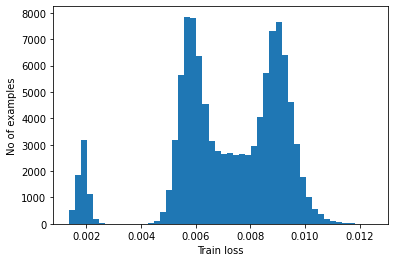

In [56]:
plt.hist(np.concatenate([dos_train_loss, normal_train_loss, gear_train_loss, rpm_train_loss]), bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [46]:
fuzzy_data[ls[0]][0], fuzzy_reconstructions[0][0]

(array([0.10552027357107963, 0.6313725709915161, 0.3490196168422699,
        0.6627451181411743, 0.8666666746139526, 0.6509804129600525,
        0.7490196228027344, 0.09803921729326248, 0.16078431904315948],
       dtype=object),
 array([0.15339401, 0.635159  , 0.38075778, 0.5816916 , 0.83662665,
        0.62291884, 0.7097167 , 0.16653644, 0.19455372], dtype=float32))

In [58]:
input_shape = (4, 10, 128)  # (batch, timesteps, features)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv1D(filters = 10, kernel_size = 3, activation='relu', input_shape=input_shape[1:])(x)
y.shape

TensorShape([4, 8, 10])